# Exponential distibution

In [2]:
# my own func
import random 
import math

def my_expon(lam, n):
    lst = []
    for i in range(n):
        r = random.random()
        x = -math.log(r,math.e) / lam
        lst.append(float('{:.3f}'.format(x)))
    
    return lst
    
# Создание m массивов выборки
def make_vibor_exp(lam, m):
    A = []
    for i in range(5):
        row = []
        A.append(row)
        #print(A)
        row.append(my_expon(lam, m))
        #print(*row)
    l = 1
    #print('Реализация выборки экспоненциального распределени объема %d: '%m)
    #print('')
    #print(A)
    for k in A:
        #print('%d): '%l, end='')
        #print(*k)
        l += 1
    new_list_exp_vibor = []
    for i in A:
        new_list_exp_vibor.append(*i)
    return new_list_exp_vibor

<font color='red'> Моделирование выбранных случайных величин </font>

In [2]:
my_expon(0.8, 5)

[1.42, 2.707, 1.599, 0.039, 0.772]

In [3]:
make_vibor_exp(0.1, 5)

[[24.201, 24.405, 5.503, 8.016, 11.146],
 [30.715, 0.333, 7.609, 1.697, 7.576],
 [5.55, 5.55, 10.048, 22.727, 2.772],
 [10.103, 2.887, 24.743, 2.297, 0.279],
 [49.833, 1.818, 16.564, 19.86, 1.674]]

In [4]:
make_vibor_exp(0.1, 10)

[[6.285, 9.497, 14.832, 3.551, 3.318, 4.205, 2.283, 9.303, 5.481, 33.742],
 [2.739, 27.475, 0.969, 4.342, 4.698, 12.864, 6.73, 8.196, 5.789, 6.461],
 [0.596, 10.874, 27.164, 0.605, 8.087, 11.692, 13.693, 23.302, 3.418, 1.447],
 [0.28, 7.768, 4.149, 1.938, 53.101, 1.453, 31.615, 1.738, 6.612, 2.103],
 [16.129, 7.178, 27.305, 3.257, 14.613, 13.769, 1.23, 0.521, 2.353, 2.744]]

In [5]:
#make_vibor_exp(0.1, 100)

In [6]:
#make_vibor_exp(0.1, 1000)

In [7]:
#make_vibor_exp(0.1, 10000)

<font color='red'> Построение эмпирической функции распределения </font> 

In [8]:
import pylab
import math 
import matplotlib
import random
import numpy as np
import scipy.stats as sc
from random import randint
import matplotlib.pyplot as plt


# Создание m массивов выборки
def make_vibor_exp(lam, m):
    A = []
    for i in range(5):
        row = []
        A.append(row)
    
        row.append(my_expon(lam, m))
        
    l = 1
    #print('Реализация выборки экспоненциального распределени объема %d: '%m)
    #print('')
    for k in A:
        #print('%d): '%l, end='')
        #print(*k)
        l += 1
    return A


def make_efr_expon(M, n, f_x = -1):

    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', ]

    upper_list = []
    
    
    for sp in range(5):
        dict_set = {}
        for i in M[sp]:
            #print(i)
            s1 = sorted(set(i)) # вариационный ряд
            capacity_vibor = len(s1)
            
            #словарь: ключ - случайная величина, значение - частота встречаемости
            for k in s1:
                dict_set[k] = [0, 0]

            for t in i: 
                dict_set[t][0] += 1
            
            # Добавление в словарь второго значения - его вероятность 
            for s in dict_set:
                a = dict_set[s][0] / n 
                dict_set[s][1] = float('{:.2f}'.format(a))

            
            lst = []
            for elem in dict_set:
                lst.append([elem, dict_set[elem][1]])
            #print(lst)
            

            #print("Эмпирическая функция для реализации %d выборки объема %s:  "%(sp + 1, n))
            final_sum = 0
            for index in range(len(lst) - 1):
                
                
                #-------------------------------------------------------------upper_limit
                final_sum += lst[index][1]
                #print(lst[index + 1])
                if lst[index ][0] <= f_x <= lst[index + 1][0]:
                    upper_list.append(final_sum)
                
                #-----------------------------------------------------------------------------
                    
                
              
                
                if f_x == -1:
                    
                    x0, y0 = [-2, lst[0][0]], [0,0]
                    x1, y1 = [lst[index][0], lst[index + 1][0]],[final_sum, final_sum]
                    x2, y2 = [lst[len(lst) - 1][0],lst[len(lst) - 1][0] + 2], [1,1]

                    #x3, y3 =[lst[0][0] - 3, lst[len(lst) - 1][0] + 3],[quant, quant]# нахождение квантили


                    plt.grid(True) #Сетка
                    plt.plot(x0,y0, x1,y1, x2, y2, marker = 'o', color = color[sp])

            if lst[len(lst) - 1][0] < f_x:
                    upper_list.append(1)
            #print(upper_list)
        
        if f_x == -1:
            plt.plot(0,0, color = color[sp], label = 'Реализация %d'%(sp+ 1))
            
            pylab.legend ()
            #plt.show()

    return upper_list






def make_сdf_expon():
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(sc.expon.ppf(0.01), sc.expon.ppf(0.9), 100)
    

    ax.plot(x, sc.expon.cdf(x),'r-', lw=5, alpha = 0.6, label='expon cdf')

    rv = sc.expon()
    
    #ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
    plt.grid(True) #Сетка
    ax.legend(loc='best', frameon = False)
    #plt.show()

    
def upper_limit_expon(M, n , f_x):
    lol = make_efr_expon(M, n, f_x)
    lol.sort(reverse = True)
        
    fin = -10000 # просто так
    #--------------------------------Ищем разность
    for i in range(len(lol) - 1):
        for k in range(len(lol)):
            res = lol[i] - lol[k]
            if res > fin:
                fin = res


    print('Точная верхняя граница выборки объема %d: '%n, float('{:.4f}'.format(abs(fin))))
    
    

<font color='blue'>Эфр для выборок объема 5: </font> 

[]

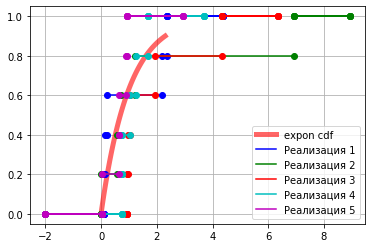

In [9]:
M = make_vibor_exp(0.8, 5)
make_сdf_expon()
make_efr_expon(M, 5)

<font color='blue'>Эфр для выборок объема 10: </font> 

[]

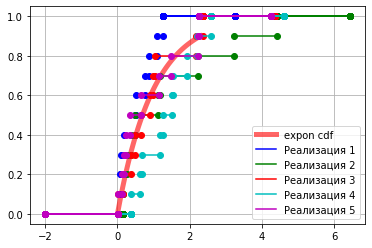

In [10]:
M = make_vibor_exp(0.8, 10)
make_сdf_expon()
make_efr_expon(M, 10)

<font color='blue'>Эфр для выборок объема 100: </font> 

[]

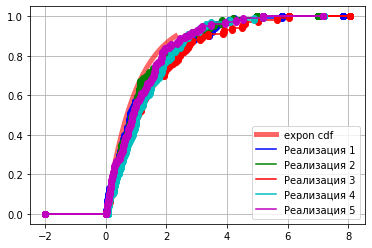

In [11]:
M = make_vibor_exp(0.8, 100)
make_сdf_expon()
make_efr_expon(M, 100)

<font color='blue'>Эфр для выборок объема 1000: </font> 

In [12]:
#M = make_vibor_exp(0.8, 1000)
#make_сdf_expon()
#make_efr_expon(M, 1000)

<font color='blue'>Эфр для выборок объема 10**5: </font> 

In [13]:
#M = make_vibor_exp(0.8, 10**5)
#make_сdf_expon()
#make_efr_expon(M, 10**5)

<font color='red'> Нахождение точной верхней границы </font> 

<font color='green'> Для n = 5: </font> 

In [14]:
M = make_vibor_exp(0.8, 5)
upper_limit_expon(M, 5, 4)

Точная верхняя граница выборки объема 5:  0.0


<font color='green'> Для n = 10: </font> 

In [15]:
M = make_vibor_exp(0.8, 10)
upper_limit_expon(M, 10, 4)

Точная верхняя граница выборки объема 10:  0.2


<font color='green'> Для n = 100: </font> 

In [16]:
M = make_vibor_exp(0.8, 100)
upper_limit_expon(M, 100, 4)

Точная верхняя граница выборки объема 100:  0.02


<font color='green'> Для n = 1000: </font> 

In [17]:
M = make_vibor_exp(0.8, 1000)
upper_limit_expon(M, 1000, 4)

Точная верхняя граница выборки объема 1000:  0.01


<font color='green'> Для n = 10**5: </font> 

In [18]:
M = make_vibor_exp(0.8, 10**5)
upper_limit_expon(M, 10**5, 4)

Точная верхняя граница выборки объема 100000:  0.0


<font color='red'> Построение вариационного ряда </font> 

In [19]:
#функция для построения вар.рядов для 5 реализаций  выборки M для n
def make_var_row_exp(n, M):
    dict_set = {}
    
    print('Вариационные ряды для 5 реализаций выборки, объема  %d:  '%n)
    print('')
    
    for sp in range(5):
        dict_set = {}
        for i in M[sp]:
            s1 = sorted(set(i))
            for k in s1:
                dict_set[k] = 0

            for t in i:
                dict_set[t] += 1

            
            print('X:', end= '\t')
            
            for elem in dict_set:
                print(elem, end='\t')
            print('')
            print('----------'*n)
            print('f:', end= '\t')
            
            for elem in dict_set:
                print(dict_set[elem], end='\t')
            print('')
            print('')
            print('')
            print('')
            #print('------')

In [20]:
M = make_vibor_exp(0.8, 5)
make_var_row_exp(5, M)

Вариационные ряды для 5 реализаций выборки, объема  5:  

X:	0.141	0.218	0.447	0.478	1.69	
--------------------------------------------------
f:	1	1	1	1	1	



X:	0.309	0.311	0.581	0.964	2.933	
--------------------------------------------------
f:	1	1	1	1	1	



X:	0.031	0.102	0.122	0.172	0.265	
--------------------------------------------------
f:	1	1	1	1	1	



X:	0.047	0.341	0.643	0.801	1.982	
--------------------------------------------------
f:	1	1	1	1	1	



X:	0.248	0.649	0.885	1.0	3.236	
--------------------------------------------------
f:	1	1	1	1	1	





In [21]:
M = make_vibor_exp(0.8, 10)
make_var_row_exp(10, M)

Вариационные ряды для 5 реализаций выборки, объема  10:  

X:	0.032	0.095	0.117	0.271	0.362	0.799	0.946	1.282	1.315	2.637	
----------------------------------------------------------------------------------------------------
f:	1	1	1	1	1	1	1	1	1	1	



X:	0.141	0.16	0.168	0.558	0.607	0.653	0.655	1.425	1.622	1.777	
----------------------------------------------------------------------------------------------------
f:	1	1	1	1	1	1	1	1	1	1	



X:	0.004	0.221	0.272	0.558	0.935	1.188	1.604	2.382	2.625	4.75	
----------------------------------------------------------------------------------------------------
f:	1	1	1	1	1	1	1	1	1	1	



X:	0.638	0.828	0.848	0.855	0.909	0.927	0.973	1.011	1.246	4.989	
----------------------------------------------------------------------------------------------------
f:	1	1	1	1	1	1	1	1	1	1	



X:	0.025	0.171	0.192	0.324	0.473	0.807	0.811	0.869	1.452	2.146	
----------------------------------------------------------------------------------------------------
f:	1	1	1	1

In [22]:
#M = make_vibor_exp(0.8, 100)
#make_var_row_exp(100, M)

In [23]:
#M = make_vibor_exp(0.8, 1000)
#make_var_row_exp(1000, M)

In [24]:
#M = make_vibor_exp(0.8, 10**5)
#make_var_row_exp(10**5, M)

# Гистограмма и полигон частот

In [28]:
import matplotlib.pyplot as plt
def make_gist_expon(r):
  fig, ax = plt.subplots(1,1)
  rgb = 'cmrgb'
  t = []
  for k in range(len(r[1])):
    t.append(len(r))
  # print(t)
  for c in range(5):
    plt.hist(r[c], alpha = 0.5,color=rgb[c], weights = t, histtype='stepfilled', density=True,label = 'gr{k}'.format(k=c+1))
  #plt.xlabel('numeber')
  #plt.ylabel('frequen')

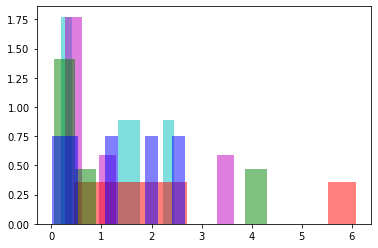

In [29]:
M = make_vibor_exp(0.8, 5) 
make_gist_expon(M)

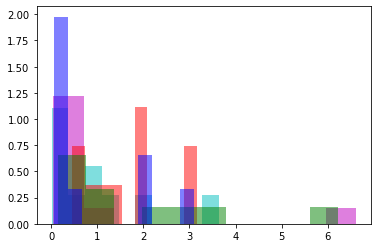

In [30]:
M = make_vibor_exp(0.8, 10) 
make_gist_expon(M)

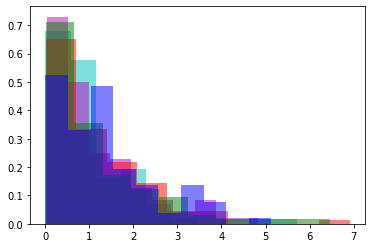

In [31]:
M = make_vibor_exp(0.8, 100) 
make_gist_expon(M)

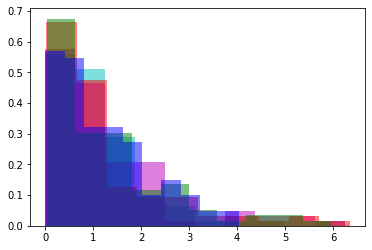

In [32]:
M = make_vibor_exp(0.8, 100) 
make_gist_expon(M)

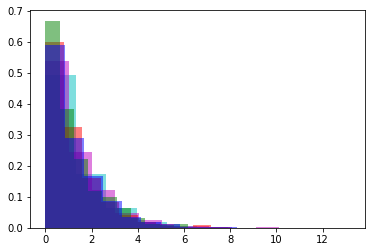

In [33]:
M = make_vibor_exp(0.8, 1000) 
make_gist_expon(M)

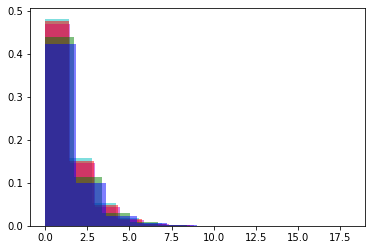

In [34]:
M = make_vibor_exp(0.8, 10**5) 
make_gist_expon(M)

Полигон

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def make_poligon_expon(mas):
   # разбиваем на отрезки 
  rgb = 'cmrgb'
  # print(mas)
  uniqq = np.unique(mas)
  fig, ax = plt.subplots(1,1)
  plt.xlabel('number')
  plt.ylabel('freq')
  for i in range(5):
    p = []
    for t in uniqq: 
      p.append(mas[i].count(t)/len(mas[1]))

    plt.plot(uniqq, p)

  # plt.plot(uniqq, list(map(lambda x : x/lam/20 ,expon.pdf(uniqq, loc=0.1, scale=1/lam))), 'g--',color='darkviolet' , lw = 2, alpha = 0.9, label= 'PDF')  
  plt.show()

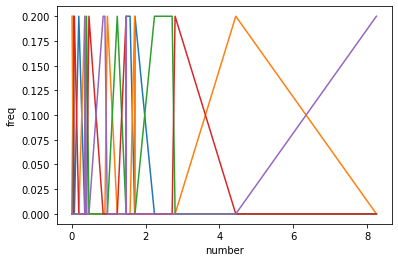

In [36]:
M = make_vibor_exp(0.8, 5) 
make_poligon_expon(M)

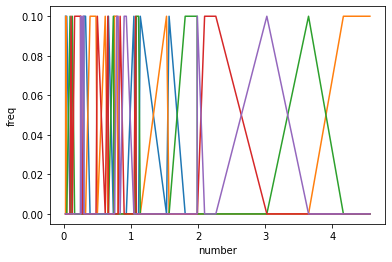

In [37]:
M = make_vibor_exp(0.8, 10) 
make_poligon_expon(M)

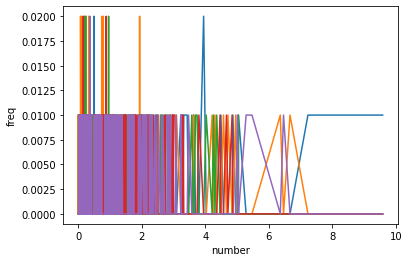

In [38]:
M = make_vibor_exp(0.8, 100) 
make_poligon_expon(M)

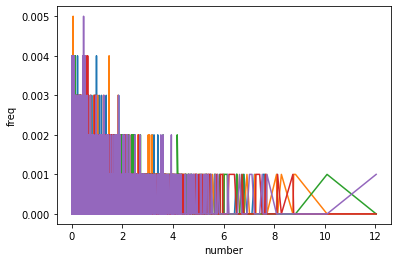

In [39]:
M = make_vibor_exp(0.8, 1000) 
make_poligon_expon(M)

In [4]:
M = make_vibor_exp(0.8, 10**5) 


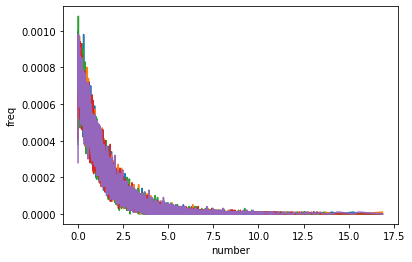

In [5]:
make_poligon_expon(M)